In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [3]:
# Set up file paths
os.chdir('/Users/nsusser/Desktop/Github/happyDB/')
# Load data 
input_path = 'analysis_data/results - factors.csv'
results = pd.read_csv(input_path)

In [4]:
# Create a mapping from Factor_# to human-readable names
factor_label_map = {
    "Factor_1": "Positive Emotions",
    "Factor_2": "Meaning and Mastery",
    "Factor_3": "Negative attitudes toward life",
    "Factor_4": "Close and Deep Relationships",
    "Factor_5": "Prosocial Behavior-Empathy for suffering",
    "Factor_6": "Engagement",
    "Factor_7": "Health",
    "Factor_8": "Autonomy",
    "Factor_9": "Vitality",
    "Factor_10": "Community & Belonging",
    "Factor_11": "Learning and Growth",
    "Factor_12": "Negative Emotions",
    "Factor_13": "Emotional Stability",
    "Factor_14": "Loneliness/Independence",
    "Factor_15": "Supportive Relationships",
    "Factor_16": "Autonomy-Engagement",
    "Factor_17": "Life Satisfaction",
    "Factor_18": "Trusting and Respectfully Relationships",
    "Factor_19": "Negative feelings toward self",
    "Factor_20": "Optimism",
    "Factor_21": "Resilience"
}

# Rename only the factor columns
results.rename(columns=factor_label_map, inplace=True)

factor_df = results.iloc[:, [1, 2] + list(range(-21, 0))]
factor_df.head()

hmid                                         cleaned_hm  \
0  27673  I went on a successful date with someone I fel...   
1  27674  I was happy when my son got 90% marks in his e...   
2  27675       I went to the gym this morning and did yoga.   
3  27676  We had a serious talk with some friends of our...   
4  27677  I went with grandchildren to butterfly display...   

   Positive Emotions  Meaning and Mastery  Negative attitudes toward life  \
0           0.339180             0.437745                       -0.057690   
1           0.989275            -0.205988                       -0.429637   
2          -1.279310             0.998694                       -0.609427   
3           0.334278             0.488914                        1.891157   
4          -0.123233            -0.247800                       -1.088872   

   Close and Deep Relationships  Prosocial Behavior-Empathy for suffering  \
0                      0.906192                                  0.501828   
1                     -0.328788                                  0.676607   
2                     -0.813609                                 -0.415163   
3                      1.679246                                  1.546247   
4                      0.598722                                  0.125059   

   Engagement    Health  Autonomy  ...  Negative Emotions  \
0    0.427236 -0.311548  1.372047  ...           1.284610   
1   -1.094066 -1.881865 -1.389394  ...          -1.095274   
2    0.047907  1.849796  0.115974  ...          -0.322062   
3   -1.023636  0.015420  1.892245  ...           0.090196   
4    1.170942  1.178237 -0.722430  ...           0.266192   

   Emotional Stability  Loneliness/Independence  Supportive Relationships  \
0            -0.089373                 1.029016                  1.396056   
1            -1.407321                -1.279183                  1.814661   
2             0.012990                 0.293794                 -0.420337   
3             0.747293                 1.300113                 -0.928223   
4             0.358138                -0.620239                 -0.017194   

   Autonomy-Engagement  Life Satisfaction  \
0            -0.237275           0.098863   
1             1.024059           1.517577   
2             0.890426           0.626990   
3             1.290432          -1.758531   
4            -0.438795           0.172262   

   Trusting and Respectfully Relationships  Negative feelings toward self  \
0                                 1.209403                       0.183206   
1                                -1.111301                       0.280118   
2                                -0.094256                       0.785793   
3                                -0.576696                      -2.800375   
4                                -1.581941                      -0.407391   

   Optimism  Resilience  
0 -0.111082    0.445893  
1 -0.866203   -0.748348  
2 -0.443137   -0.225095  
3 -1.102448   -0.246136  
4  0.246818   -0.509145  

[5 rows x 23 columns]

In [5]:
threshold = 0.8
filtered_sentences = {factor: factor_df.loc[factor_df[factor] > threshold, ['hmid', 'cleaned_hm']] for factor in factor_df.columns[2:]}
filtered_sentences.keys()

dict_keys(['Positive Emotions', 'Meaning and Mastery', 'Negative attitudes toward life', 'Close and Deep Relationships', 'Prosocial Behavior-Empathy for suffering', 'Engagement', 'Health', 'Autonomy', 'Vitality', 'Community & Belonging', 'Learning and Growth', 'Negative Emotions', 'Emotional Stability', 'Loneliness/Independence', 'Supportive Relationships', 'Autonomy-Engagement', 'Life Satisfaction', 'Trusting and Respectfully Relationships', 'Negative feelings toward self', 'Optimism', 'Resilience'])

In [6]:
factor_counts = {factor: len(filtered_sentences[factor]) for factor in filtered_sentences}
factor_counts

{'Positive Emotions': 15439,
 'Meaning and Mastery': 24179,
 'Negative attitudes toward life': 16210,
 'Close and Deep Relationships': 25419,
 'Prosocial Behavior-Empathy for suffering': 10206,
 'Engagement': 21804,
 'Health': 18912,
 'Autonomy': 21256,
 'Vitality': 19632,
 'Community & Belonging': 18286,
 'Learning and Growth': 17582,
 'Negative Emotions': 13052,
 'Emotional Stability': 17749,
 'Loneliness/Independence': 16246,
 'Supportive Relationships': 17030,
 'Autonomy-Engagement': 16735,
 'Life Satisfaction': 18130,
 'Trusting and Respectfully Relationships': 18224,
 'Negative feelings toward self': 11334,
 'Optimism': 18264,
 'Resilience': 16485}

In [7]:
sentences = pd.read_csv('dataframes/clean_sentences.csv')
sentences.head()


hmid reflection_period                                         cleaned_hm
0  27673               24h  I went on a successful date with someone I fel...
1  27674               24h  I was happy when my son got 90% marks in his e...
2  27675               24h       I went to the gym this morning and did yoga.
3  27676               24h  We had a serious talk with some friends of our...
4  27677               24h  I went with grandchildren to butterfly display...

In [8]:
# Merge factor data with sentences on 'hmid' to include 'reflection_period'
merged_df = factor_df.merge(sentences[['hmid', 'reflection_period']], on='hmid', how='inner')

# Z-score factor columns (excluding 'hmid' and 'cleaned_hm')
factor_columns = factor_df.columns[2:]  # Assuming first two columns are 'hmid' and 'cleaned_hm'
merged_df[factor_columns] = merged_df[factor_columns].apply(zscore, axis=0)


# Initialize dictionary to store normalized counts by factor and reflection period
factor_percentages_by_period = {}
factor_counts_by_period = {}

# Get total number of sentences per reflection period
total_sentences_per_period = merged_df['reflection_period'].value_counts().to_dict()

# Loop through each factor and compute normalized percentages
for factor in factor_df.columns[2:]:  # Skip 'hmid' and 'cleaned_hm'
    filtered_df = merged_df[merged_df[factor] >= .8]  # Apply threshold

    # Count occurrences per reflection period
    counts = filtered_df.groupby('reflection_period').size().to_dict()
    
    # Normalize by total sentences per period
    percentages = {period: (counts.get(period, 0) / total_sentences_per_period[period]) * 100 
                   for period in total_sentences_per_period}
    
    #store counts in dictionary
    factor_counts_by_period[factor] = counts
    
    # Store result in dictionary
    factor_percentages_by_period[factor] = percentages

# Print the results
factor_percentages_by_period


{'Positive Emotions': {'3m': 18.830374753451675, '24h': 12.435524335173106},
 'Meaning and Mastery': {'3m': 27.57790927021696, '24h': 20.820873055694932},
 'Negative attitudes toward life': {'3m': 17.497041420118343,
  '24h': 15.175112895132967},
 'Close and Deep Relationships': {'3m': 26.2465483234714,
  '24h': 24.836929252383342},
 'Prosocial Behavior-Empathy for suffering': {'3m': 11.36094674556213,
  '24h': 10.007024586051179},
 'Engagement': {'3m': 22.615384615384613, '24h': 23.102860010035123},
 'Health': {'3m': 18.550295857988168, '24h': 21.67185148018063},
 'Autonomy': {'3m': 23.96844181459566, '24h': 21.627696939287507},
 'Vitality': {'3m': 20.664694280078898, '24h': 21.455092824887103},
 'Community & Belonging': {'3m': 23.157790927021697,
  '24h': 17.336678374310086},
 'Learning and Growth': {'3m': 21.244575936883628, '24h': 16.80481685900652},
 'Negative Emotions': {'3m': 15.91518737672584, '24h': 12.660311088810838},
 'Emotional Stability': {'3m': 17.842209072978303, '24h':

In [9]:
per = pd.DataFrame(factor_percentages_by_period).T
print(per)

                                                 3m        24h
Positive Emotions                         18.830375  12.435524
Meaning and Mastery                       27.577909  20.820873
Negative attitudes toward life            17.497041  15.175113
Close and Deep Relationships              26.246548  24.836929
Prosocial Behavior-Empathy for suffering  11.360947  10.007025
Engagement                                22.615385  23.102860
Health                                    18.550296  21.671851
Autonomy                                  23.968442  21.627697
Vitality                                  20.664694  21.455093
Community & Belonging                     23.157791  17.336678
Learning and Growth                       21.244576  16.804817
Negative Emotions                         15.915187  12.660311
Emotional Stability                       17.842209  23.092825
Loneliness/Independence                   18.822485  19.861515
Supportive Relationships                  20.055227  17

In [10]:
counts = pd.DataFrame(factor_counts_by_period).T
print(counts)
counts.to_csv('analysis_data/factor_counts_by_period.csv')

                                            24h     3m
Positive Emotions                          6196   9547
Meaning and Mastery                       10374  13982
Negative attitudes toward life             7561   8871
Close and Deep Relationships              12375  13307
Prosocial Behavior-Empathy for suffering   4986   5760
Engagement                                11511  11466
Health                                    10798   9405
Autonomy                                  10776  12152
Vitality                                  10690  10477
Community & Belonging                      8638  11741
Learning and Growth                        8373  10771
Negative Emotions                          6308   8069
Emotional Stability                       11506   9046
Loneliness/Independence                    9896   9543
Supportive Relationships                   8712  10168
Autonomy-Engagement                       10120   9761
Life Satisfaction                          9685  10468
Trusting a

stopwords_map = {'Positive Emotions': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'finally got',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Meaning and Mastery': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got good',
  'got job',
  'got new',
  'got promotion',
  'got raise',
  'happiest moment',
  'happy able',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'promotion work',
  'raise work',
  'really good',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Negative attitudes toward life': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'credit card',
  'day life',
  'day school',
  'extremely happy',
  'feel happy',
  'felt happy',
  'finally able',
  'friend haven',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'memorable day',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really felt',
  'really happy',
  'school friend',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Close, loving relationships': {'24 hours',
  'best friend',
  'came visit',
  'day life',
  'extremely happy',
  'family members',
  'feel happy',
  'felt happy',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'high school',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'old friend',
  'past 24',
  'past months',
  'really happy',
  'time family',
  'weeks ago',
  'year old'},
 'Prosocial Behavior-Empathy for suffering': {'24 hours',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'happiest moment',
  'happy able',
  'happy day',
  'happy got',
  'happy happy',
  'happy moment',
  'happy past',
  'happy seeing',
  'happy time',
  'long time',
  'make happy',
  'make roti',
  'makes happy',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'really happy',
  'rs 3000',
  'weeks ago',
  'year old'},
 'Engagement': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'enjoyed lot',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'got spend',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'lot fun',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really enjoyed',
  'really happy',
  'spent day',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Health': {'24 hours',
  'able sleep',
  'bike ride',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got home',
  'got sleep',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'long time',
  'long walk',
  'makes happy',
  'moment life',
  'months ago',
  'night sleep',
  'past 24',
  'past months',
  'really happy',
  'took dog',
  'weeks ago',
  'went gym',
  'year old'},
 'Autonomy': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'purchased new',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went dinner',
  'went movie',
  'went shopping',
  'year old'},
 'Vitality': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'colleagues great',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'offsite colleagues',
  'past 24',
  'past months',
  'presented new',
  'really happy',
  'spent time',
  'surprise given',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Community & Belonging': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got accepted',
  'got job',
  'got married',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new house',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'team won',
  'video game',
  'weeks ago',
  'went shopping',
  'won game',
  'year old'},
 'Learning and Growth': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'define happiness',
  'extremely happy',
  'feel happy',
  'felt happy',
  'fun stimulating',
  'got job',
  'got new',
  'happiest moment',
  'happiness identify',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'stimulating discussions',
  'tried new',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Negative Emotions': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'exam time',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'hadn seen',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'job interview',
  'job offer',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'moved new',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'romantic date',
  'seen years',
  'spent time',
  'video game',
  'weeks ago',
  'went date',
  'went shopping',
  'year old'},
 'Emotional Stability': {'24 hours',
  'credit card',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'good time',
  'got work',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'home work',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'really happy',
  'really nice',
  'weeks ago',
  'work today',
  'year old'},
 'Loneliness/Independence': {'24 hours',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'friend hadn',
  'friend haven',
  'hadn seen',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'long time',
  'makes happy',
  'met old',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'really happy',
  'seen long',
  'seen long time',
  'seen years',
  'weeks ago',
  'year old'},
 'Relationships-Support': {'24 hours',
  'daughter',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'happy son',
  'home work',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'mother day',
  'old son',
  'past 24',
  'past months',
  'really happy',
  'son got',
  'weeks ago',
  'year old'},
 'Autonomy-Engagement': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'enjoyed lot',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'got spend',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'lot fun',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really enjoyed',
  'really happy',
  'spent day',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Life Satisfaction': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'define happiness',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happiness identify',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'went temple',
  'year old'},
 'Relationships-Trust and Respect': {'24 hours',
  'big hug',
  'bonus work',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got free',
  'got promotion',
  'got raise',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'past 24',
  'past months',
  'promotion work',
  'raise work',
  'really happy',
  'weeks ago',
  'year old'},
 'Negative feelings toward self': {'24 hours',
  'able pay',
  'bought new',
  'bought new car',
  'came home',
  'credit card',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'finally able',
  'finally passed',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'lost pounds',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Optimism': {'24 hours',
  'baby girl',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'extremely happy',
  'feel happy',
  'felt happy',
  'gave birth',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'looking forward',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'},
 'Resilience': {'24 hours',
  'bought new',
  'bought new car',
  'came home',
  'day life',
  'event happy past',
  'extremely happy',
  'feel happy',
  'felt happy',
  'got job',
  'got new',
  'happiest moment',
  'happy day',
  'happy got',
  'happy moment',
  'happy past',
  'ice cream',
  'long time',
  'makes happy',
  'moment life',
  'months ago',
  'new car',
  'new job',
  'past 24',
  'past months',
  'really happy',
  'spent time',
  'video game',
  'weeks ago',
  'went shopping',
  'year old'}}

In [11]:
# First, create a dataframe with only the factor columns
factor_columns = [col for col in factor_df.columns if col in factor_label_map.values()]
factors_only_df = factor_df[factor_columns]

# Get dominant factor index (highest score per sentence)
dominant_factor_indices = factors_only_df.idxmax(axis=1)  # Name of strongest factor column
dominant_factor_values = factors_only_df.max(axis=1)      # Highest factor value per sentence

# Add these to the original dataframe
factor_df['dominant_factor'] = dominant_factor_indices
factor_df['factor_strength'] = dominant_factor_values

# Print a preview
print("Dominant Factor Shape:", factor_df['dominant_factor'].shape)
print("Factor Strength Shape:", factor_df['factor_strength'].shape)
print(factor_df[['dominant_factor', 'factor_strength']].head())

Dominant Factor Shape: (100525,)
Factor Strength Shape: (100525,)
            dominant_factor  factor_strength
0  Supportive Relationships         1.396056
1  Supportive Relationships         1.814661
2                    Health         1.849796
3                  Autonomy         1.892245
4                    Health         1.178237


/var/folders/4c/79cv38ss4p33v55cqytbn83m0000gp/T/ipykernel_71904/2353126735.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_df['dominant_factor'] = dominant_factor_indices
/var/folders/4c/79cv38ss4p33v55cqytbn83m0000gp/T/ipykernel_71904/2353126735.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_df['factor_strength'] = dominant_factor_values


In [12]:
# Assuming factor_df already has the 'dominant_factor' column added

# Count the number of moments per dominant factor
factor_counts = factor_df['dominant_factor'].value_counts()

# Print the count
print("Number of moments per dominant factor:")
print(factor_counts)




Number of moments per dominant factor:
dominant_factor
Close and Deep Relationships                9746
Meaning and Mastery                         8413
Health                                      6998
Autonomy                                    6027
Learning and Growth                         5417
Engagement                                  5350
Negative attitudes toward life              5316
Supportive Relationships                    5120
Community & Belonging                       5066
Loneliness/Independence                     4792
Trusting and Respectfully Relationships     4605
Prosocial Behavior-Empathy for suffering    4523
Emotional Stability                         4303
Optimism                                    4090
Life Satisfaction                           3961
Vitality                                    3841
Negative Emotions                           3770
Resilience                                  3220
Autonomy-Engagement                         3104
Positive Emoti

In [20]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import math

# Function to clean text by removing special characters and converting to lowercase
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters
        text = re.sub(r'[^\w\s]', ' ', text)
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return ""

# Generate a word cloud from text data
def generate_word_cloud(text_data, title=None, stopwords=None, colormap='viridis', 
                        max_words=100, width=800, height=500):
    """
    Generate a word cloud from text data.
    """
    # If stopwords is None, create an empty set
    if stopwords is None:
        stopwords = set()
    
    # Create the word cloud
    wc = WordCloud(
        background_color="white",
        max_words=max_words,
        width=width,
        height=height,
        colormap=colormap,
        stopwords=stopwords,
        random_state=42,
        collocations=False,
        prefer_horizontal=0.9,
        min_font_size=8
    )
    
    # Generate word cloud based on input type
    if isinstance(text_data, dict) and text_data:  # Check if dictionary is not empty
        try:
            wc.generate_from_frequencies(text_data)
        except ValueError:
            print(f"No valid words found for {title}. Check your stopwords filter.")
            # Return a blank word cloud object
            return None
    elif isinstance(text_data, str) and text_data.strip():  # Check if string is not empty
        try:
            wc.generate(text_data)
        except ValueError:
            print(f"No valid words found for {title}. Check your text data.")
            return None
    else:
        print(f"No valid data for word cloud: {title}")
        return None
    
    # Create the figure and plot
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    
    if title:
        plt.title(title, fontsize=15)
    
    plt.tight_layout()
    plt.show()
    
    return wc

# Create a word cloud from word frequencies
def create_frequency_word_cloud(word_freq_dict, title="Word Frequency Cloud", stopwords=None, colormap='plasma'):
    """
    Create a word cloud from a dictionary of word frequencies
    """
    if not word_freq_dict:
        print("Word frequency dictionary is empty")
        return None
    
    # Filter out stopwords if provided
    if stopwords:
        word_freq_dict = {word: freq for word, freq in word_freq_dict.items() 
                         if word.lower() not in stopwords}
    
    if not word_freq_dict:
        print("No words left after stopword filtering")
        return None
    
    # Generate the word cloud
    return generate_word_cloud(word_freq_dict, title=title, colormap=colormap)

# Calculate word frequencies for each factor
def calculate_factor_word_frequencies(df, text_column='cleaned_hm', 
                                      factor_column='dominant_factor',
                                      strength_column='factor_strength',
                                      strength_threshold=0.0,
                                      stopwords=None):
    """
    Calculate word frequencies for each factor using only the sentences 
    where that factor is dominant.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Dataframe containing the text and factor information
    text_column : str
        Name of the column containing the text data
    factor_column : str
        Name of the column containing the dominant factor for each row
    strength_column : str
        Name of the column containing the strength of the dominant factor
    strength_threshold : float
        Only include rows where the factor strength is above this threshold
    stopwords : set or None
        Set of words to exclude from the frequency counts
        
    Returns:
    --------
    dict
        Dictionary where keys are factor names and values are dictionaries
        of word frequencies for that factor
    """
    if stopwords is None:
        stopwords = set()
    
    # Create a dictionary to store word frequencies for each factor
    factor_word_frequencies = {}
    
    # Get unique factors in the dataset
    unique_factors = df[factor_column].unique()
    
    for factor in unique_factors:
        # Filter rows where this factor is dominant and above threshold
        factor_texts = df[(df[factor_column] == factor) & 
                          (df[strength_column] > strength_threshold)][text_column].dropna()
        
        if factor_texts.empty:
            print(f"No texts found for factor '{factor}' with threshold {strength_threshold}")
            continue
            
        # Clean and tokenize the texts
        all_words = []
        for text in factor_texts:
            if isinstance(text, str):
                # Clean the text
                cleaned_text = clean_text(text)
                # Split into words
                words = cleaned_text.split()
                # Remove stopwords
                words = [word for word in words if word.lower() not in stopwords and len(word) > 1]
                all_words.extend(words)
        
        # Count word frequencies
        word_counts = Counter(all_words)
        
        # Store in the dictionary
        factor_word_frequencies[factor] = dict(word_counts)
    
    return factor_word_frequencies

# Calculate balanced importance scores for words in each factor
def calculate_word_importance_scores(factor_word_frequencies, min_term_freq=3, sublinear_tf=True, idf_smoothing=1.0):
    """
    Calculate importance scores for words in each factor using a balanced TF-IDF style approach.
    
    Parameters:
    -----------
    factor_word_frequencies : dict
        Dictionary where keys are factor names and values are dictionaries
        of word frequencies for that factor
    min_term_freq : int
        Minimum number of times a word must appear in a factor to be considered
    sublinear_tf : bool
        Whether to use sublinear scaling for term frequency (log scaling)
    idf_smoothing : float
        Smoothing factor for IDF calculation to reduce impact of very rare words
        
    Returns:
    --------
    dict
        Dictionary where keys are factor names and values are dictionaries
        of word importance scores for that factor
    """
    # Count how many factors each word appears in
    word_factor_counts = {}
    all_factors = list(factor_word_frequencies.keys())
    n_factors = len(all_factors)
    
    # Count total words per factor for TF calculation
    factor_total_words = {}
    
    # Get global word counts for reference
    global_word_counts = {}
    
    for factor, word_freqs in factor_word_frequencies.items():
        factor_total_words[factor] = sum(word_freqs.values())
        
        for word, freq in word_freqs.items():
            # Update factor count for this word
            if word not in word_factor_counts:
                word_factor_counts[word] = 0
            word_factor_counts[word] += 1
            
            # Update global word count
            if word not in global_word_counts:
                global_word_counts[word] = 0
            global_word_counts[word] += freq
    
    # Calculate importance scores for each word in each factor
    word_importance_scores = {}
    
    for factor in all_factors:
        word_importance_scores[factor] = {}
        
        if factor not in factor_word_frequencies:
            continue
            
        word_freqs = factor_word_frequencies[factor]
        
        for word, freq in word_freqs.items():
            # Skip words that don't meet minimum term frequency
            if freq < min_term_freq:
                continue
                
            # Term Frequency (TF) with optional sublinear scaling
            if sublinear_tf:
                # Add 1 before taking log to avoid log(1) = 0
                tf = 1 + math.log(freq)
            else:
                tf = freq / factor_total_words[factor]
            
            # Inverse Document Frequency (IDF) with smoothing
            # Smoothing reduces the impact of very rare words
            idf = math.log((n_factors + idf_smoothing) / (word_factor_counts[word] + idf_smoothing))
            
            # TF-IDF score
            tfidf = tf * idf
            
            # Adjust score based on global frequency to further reduce bias towards rare words
            # This multiplies by the square root of the global frequency to give some boost to common words
            adjusted_score = tfidf * math.sqrt(global_word_counts[word] / sum(global_word_counts.values()))
            
            word_importance_scores[factor][word] = adjusted_score
    
    return word_importance_scores

# Visualize word importance scores for each factor
def visualize_word_importance(word_importance_scores, factors_to_visualize=None, 
                            top_n=20, stopwords=None, colormap='viridis'):
    """
    Create word clouds and print top words based on importance scores for each factor.
    
    Parameters:
    -----------
    word_importance_scores : dict
        Dictionary where keys are factor names and values are dictionaries
        of word importance scores for that factor
    factors_to_visualize : list or None
        List of factor names to visualize. If None, visualize all factors.
    top_n : int
        Number of top words to include in the visualization
    stopwords : set or None
        Additional stopwords to filter out
    colormap : str
        Matplotlib colormap to use for the word cloud
    """
    # If no factors specified, use all factors
    if factors_to_visualize is None:
        factors_to_visualize = list(word_importance_scores.keys())

    # Ensure the images folder exists
    os.makedirs("images/wordcloud", exist_ok=True)

    all_used_words = set()  # To collect all used words

    for factor in factors_to_visualize:
        if factor not in word_importance_scores:
            print(f"Factor '{factor}' not found in the word importance scores dictionary")
            continue
            
        word_scores = word_importance_scores[factor]
        
        if not word_scores:
            print(f"No word importance scores found for factor '{factor}'")
            continue
        
        # Sort by importance score and take top N words
        sorted_word_scores = dict(sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:top_n])
        all_used_words.update(sorted_word_scores.keys())

        # Create word cloud
        wc = create_frequency_word_cloud(
            sorted_word_scores, 
            title=f"Top {top_n} Distinctive Words for {factor}",
            stopwords=stopwords,
            colormap=colormap
        )
        if wc:
            safe_name = factor.replace(" ", "_").replace("/", "_").replace("&", "and")
            image_path = f"images/wordcloud/{safe_name}.png"
            wc.to_file(image_path)
        
        # Also print the top words and their importance scores
        print(f"\nTop {top_n} distinctive words for {factor}:")
        for word, score in sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]:
            print(f"{word}: {score:.6f}")
        
    return list(all_used_words)

# Complete analysis pipeline function
def analyze_factor_word_importance(df, text_column='cleaned_hm', 
                                 factor_column='dominant_factor',
                                 strength_column='factor_strength',
                                 strength_threshold=0.5,
                                 factors_to_visualize=None, 
                                 top_n=20,
                                 stopwords=None,
                                 colormap='viridis',
                                 min_term_freq=3,
                                 sublinear_tf=True,
                                 idf_smoothing=1.0):
    """
    Complete pipeline to analyze and visualize distinctive words for each factor.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Dataframe containing the text and factor information
    text_column : str
        Name of the column containing the text data
    factor_column : str
        Name of the column containing the dominant factor for each row
    strength_column : str
        Name of the column containing the strength of the dominant factor
    strength_threshold : float
        Only include rows where the factor strength is above this threshold
    factors_to_visualize : list or None
        List of factor names to visualize. If None, visualize all factors.
    top_n : int
        Number of top words to include in the visualization
    stopwords : set or None
        Set of words to exclude from the frequency counts
    colormap : str
        Matplotlib colormap to use for the word cloud
    min_term_freq : int
        Minimum number of times a word must appear in a factor to be considered
    sublinear_tf : bool
        Whether to use sublinear scaling for term frequency (log scaling)
    idf_smoothing : float
        Smoothing factor for IDF calculation to reduce impact of very rare words
        
    Returns:
    --------
    tuple
        (factor_word_frequencies, word_importance_scores) - dictionaries with the 
        raw word frequencies and calculated importance scores
    """
    print("Calculating word frequencies for each factor...")
    # Step 1: Calculate word frequencies for each factor
    factor_word_frequencies = calculate_factor_word_frequencies(
        df, 
        text_column=text_column,
        factor_column=factor_column,
        strength_column=strength_column,
        strength_threshold=strength_threshold,
        stopwords=stopwords
    )
    
    print("Calculating word importance scores...")
    # Step 2: Calculate word importance scores using balanced TF-IDF approach
    word_importance_scores = calculate_word_importance_scores(
        factor_word_frequencies,
        min_term_freq=min_term_freq,
        sublinear_tf=sublinear_tf,
        idf_smoothing=idf_smoothing
    )
    
    print("Visualizing distinctive words for each factor...")
    # Step 3: Visualize the results
    used_words = visualize_word_importance(
        word_importance_scores,
        factors_to_visualize=factors_to_visualize,
        top_n=top_n,
        stopwords=stopwords,
        colormap=colormap
    )
    
    return factor_word_frequencies, word_importance_scores, used_words

# Example usage:
# First, ensure you have calculated dominant factors for your dataframe:
# 
# # Create a dataframe with only the factor columns
# factor_columns = [col for col in factor_df.columns if col in factor_label_map.values()]
# factors_only_df = factor_df[factor_columns]
# 
# # Get dominant factor index (highest score per sentence)
# factor_df['dominant_factor'] = factors_only_df.idxmax(axis=1)  # Name of strongest factor column
# factor_df['factor_strength'] = factors_only_df.max(axis=1)     # Highest factor value per sentence
# 
# # Then, run the complete analysis pipeline:
# freq_dict, importance_dict = analyze_factor_word_importance(
#     factor_df, 
#     text_column='cleaned_hm',
#     factor_column='dominant_factor',
#     strength_column='factor_strength',
#     strength_threshold=0.5,
#     factors_to_visualize=["Positive Emotions", "Close and Deep Relationships"],
#     top_n=20,
#     stopwords=universal_stopwords
# )

In [22]:

universal_stopwords = {
    "with my", "in the", "made me", "it was", "went to", "able to", "of my", "me happy", "in my", "for the",
    "of the", "very happy", "to the", "made me happy", "to my", "on the", "and it", "was able", "was able to",
    "to see", "for my", "one of", "at the", "got to", "the first", "my son", "was happy", "my life",
    "was very",  "on my", "and we", "was so happy", "to be happy", "to be able", "was so happy", "was so", "was very happy",
    "and was", "to be", "happy to", "happy when",  "first time", "that made", "to get",
    "the first time", "the day", "going to", "to go", "that made me", "for the first", "at work", "last night",
    "for me", "me and", "and the", "that was", "and my", "we had", "found out",
    "so happy", "it made", "to me", "when my",  "me to", "was so", 
    "and had", "it made me", "long time",  "this morning", "told me", "was happy when",
    "have been",  "lot of", "had been", "the past", "from my", "time with",
    "to do", "she was", "in my life", "bought new", "and she", "one of my",
    "and it was", "event that",  "makes me", "at my",  "time in",
    "out of", "happiest moment", "gave me", "that my", "it is", "to temple",
    "went for", "seen in", "went out", "woke up", "out to", "an old", 
    "year old", "that had", "event that made", "with her",  "me feel",
    "to help",  "have to", "how to", "went on", "went to the", "out that", "talked to", 
    "go to", "and got",  "with me", "see my",  "he was", "haven seen",
    "after long", "of my favorite", "and he","i", "my", "was", "to", "the", "a", "is", "in", "of", "for", "that", "it", "on",
    "with", "and", "at", "as", "by", "an", "be", "this", "wasn't", "we", "so", "from",
    "there", "but", "what", "who", "when", "where", "which", "if", "then", "they", "them",
    "their", "these", "those", "he", "she", "my", "you", "your", "his", "her", "its",
    "our", "its", "me", "us", "him", "her", "them", "that", "these", "those",
    "such", "more", "most", "some", "any", "no", "none", "all", "both", "few",
    "many", "much", "little", "less", "least", "other", "another", "same", "same as",
    "different", "different from", "same as", "like", "unlike", "similar", "opposite",
    "same", "different", "more than", "less than", "greater than", "smaller than",
    "better than", "worse than", "equal to", "not equal to", "between", "among",
    "before", "after", "during", "while", "until", "since", "for", "ago", "about",
    "around", "through", "across", "along", "with", "without", "within", "outside",
    "above", "below", "under", "over", "between", "among", "against", "toward",
    "towards", "alongside", "beside", "next to", "near", "far", "close to",
    "away from", "toward", "towards", "against", "alongside", "beside", "next to",
    "near", "far", "close to", "away from", "toward", "towards", "against",
    "alongside", "beside", "next to", "near", "far", "close to", "away from",
    "toward", "towards", "against", "alongside", "beside", "next to", "near",
    "far", "close to", "away from", "toward", "towards", "against", "alongside",
    "beside", "next to", "near", "far", "close to", "away from", "toward", "got",
    "made", "time", "happy", "had", "see", "want", "go", "know", "think", "feel",
    "say", "tell", "give", "take", "make", "do", "have", "be", "is", "are",
    "was", "were", "will", "would", "can", "could", "should", "may", "might",
    "must", "shall", "ought", "need", "want", "like", "love", "hate", "prefer","have",
    "day", "s", "S", "time", "thing", "things", "one", "two", "three", "four", "five", "went", 
    "out", "00am", "rs", "ai", "bhk", "unfortunately", "potty", "potty trained", "potty training","ooty",
    "28th", "10th", "10class", "6th", "abt", "un", "dat", "25th", "2nd", "3rd", "4th", "5th",
    "6th", "7th", "8th", "9th", "10th", "11th", "12th", "13th", "14th", "15th",
    "16th", "17th", "18th", "19th", "20th", "21st", "22nd", "23rd", "24th",
    "25th", "26th", "27th", "28th", "29th", "30th", "31st", "1st", "2nd", "thekkady",
    "ruut", "anand", "Diener", "Seligman", "Sen", "amartya", "selgiman", "veenhoven",
    "varasani", "stil", "yeong", "9and", "gvn", "wayanda", "ay", "bt", "jin", "beom", "itas", "jigarthanda", "nadu", "s8", "logan"
}


/var/folders/4c/79cv38ss4p33v55cqytbn83m0000gp/T/ipykernel_71904/2436670980.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_df['dominant_factor'] = factors_only_df.idxmax(axis=1)
/var/folders/4c/79cv38ss4p33v55cqytbn83m0000gp/T/ipykernel_71904/2436670980.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factor_df['factor_strength'] = factors_only_df.max(axis=1)


Calculating word frequencies for each factor...
Calculating word importance scores...
Visualizing distinctive words for each factor...


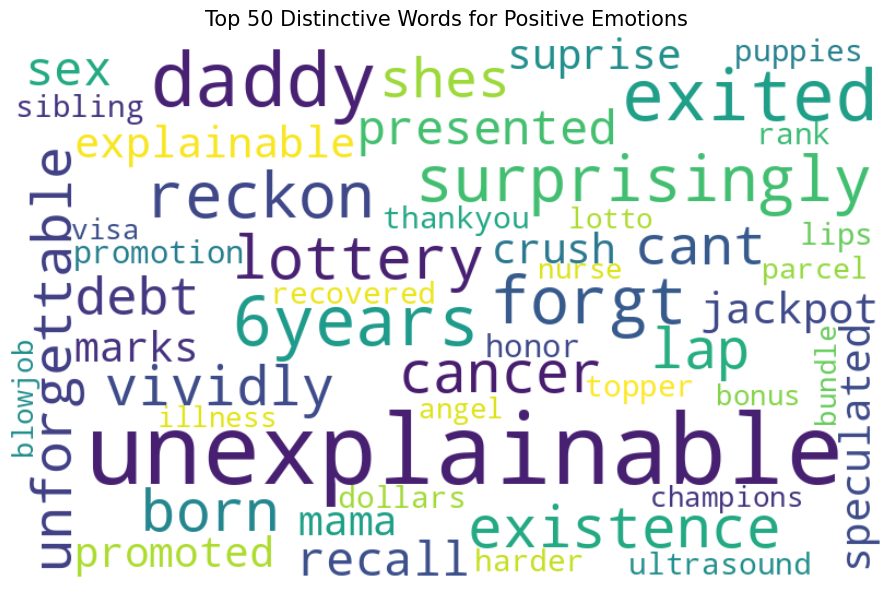


Top 50 distinctive words for Positive Emotions:
unexplainable: 0.060988
daddy: 0.032901
exited: 0.029027
6years: 0.027420
forgt: 0.024938
surprisingly: 0.023222
reckon: 0.022841
lottery: 0.020561
existence: 0.019229
born: 0.018867
cancer: 0.017882
lap: 0.017415
unforgettable: 0.016837
vividly: 0.016820
shes: 0.016520
cant: 0.016510
debt: 0.015505
presented: 0.015444
sex: 0.015384
recall: 0.015064
explainable: 0.014915
jackpot: 0.014723
speculated: 0.014182
crush: 0.014002
promoted: 0.013917
suprise: 0.013832
marks: 0.013611
mama: 0.013445
promotion: 0.013333
honor: 0.013264
ultrasound: 0.013061
sibling: 0.012956
thankyou: 0.012628
topper: 0.012571
dollars: 0.012552
rank: 0.012544
lips: 0.012498
puppies: 0.012419
recovered: 0.012349
harder: 0.012300
parcel: 0.011792
champions: 0.011653
illness: 0.011626
blowjob: 0.011500
lotto: 0.011409
visa: 0.011346
nurse: 0.011261
bonus: 0.011239
bundle: 0.011156
angel: 0.011119


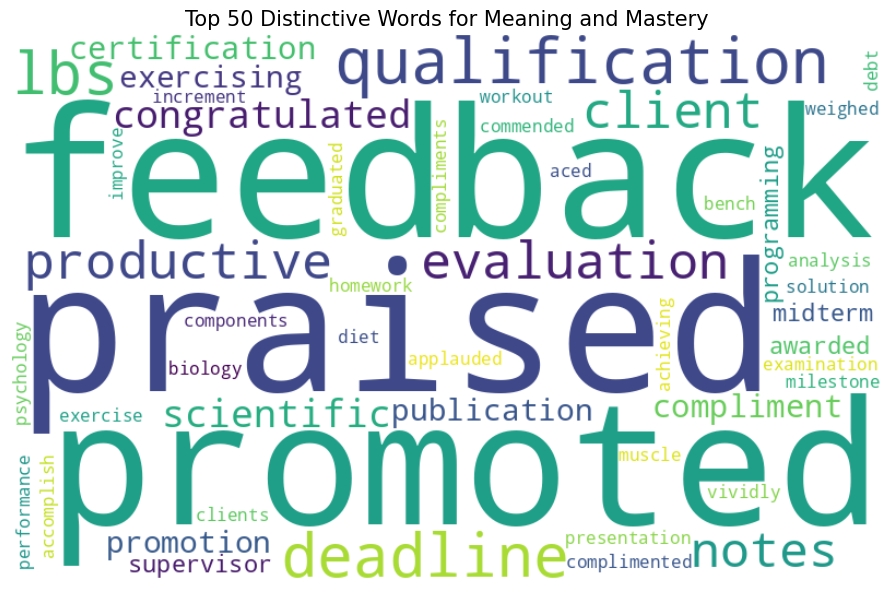


Top 50 distinctive words for Meaning and Mastery:
feedback: 0.041581
praised: 0.041297
promoted: 0.041141
qualification: 0.039729
deadline: 0.035661
lbs: 0.034851
productive: 0.033777
evaluation: 0.033281
client: 0.032540
notes: 0.030618
congratulated: 0.029888
scientific: 0.029371
certification: 0.029324
compliment: 0.028378
promotion: 0.028194
exercising: 0.027687
publication: 0.027398
supervisor: 0.027188
awarded: 0.027130
midterm: 0.026262
programming: 0.026257
presentation: 0.026180
complimented: 0.026098
exercise: 0.026052
commended: 0.025725
milestone: 0.025503
aced: 0.025489
analysis: 0.025123
solution: 0.024920
workout: 0.024670
compliments: 0.024614
bench: 0.024549
weighed: 0.024201
performance: 0.024043
debt: 0.023972
clients: 0.023844
components: 0.023824
biology: 0.023664
applauded: 0.023500
accomplish: 0.023383
homework: 0.023334
increment: 0.023285
achieving: 0.023235
improve: 0.023034
graduated: 0.022956
diet: 0.022938
examination: 0.022831
vividly: 0.022600
psychology

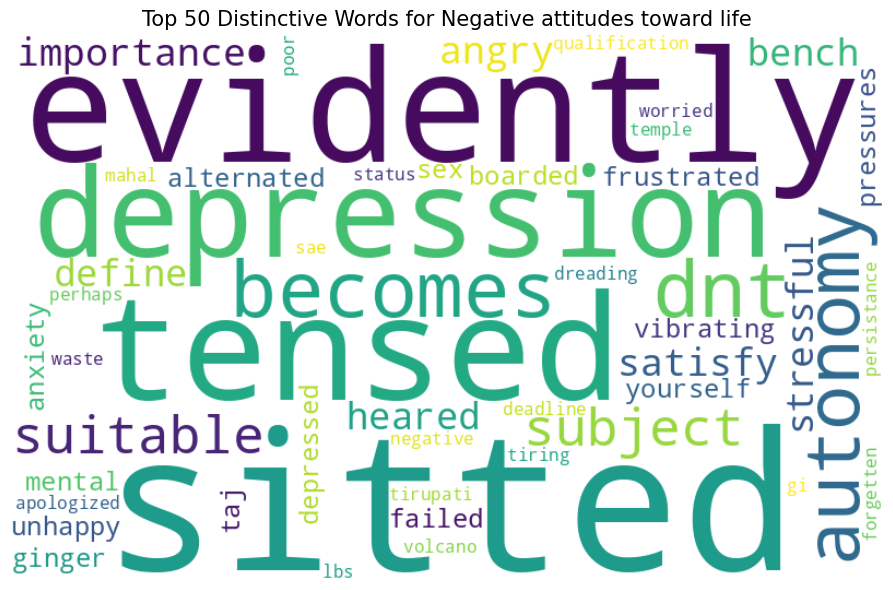


Top 50 distinctive words for Negative attitudes toward life:
sitted: 0.070069
evidently: 0.042761
tensed: 0.038086
depression: 0.037943
becomes: 0.037695
dnt: 0.037339
autonomy: 0.035401
suitable: 0.035154
subject: 0.034801
importance: 0.034170
angry: 0.033256
satisfy: 0.032788
heared: 0.031697
bench: 0.031298
define: 0.031148
stressful: 0.030500
vibrating: 0.030374
frustrated: 0.029828
taj: 0.028965
mental: 0.028867
unhappy: 0.028557
anxiety: 0.028420
failed: 0.028103
yourself: 0.027609
sex: 0.027198
alternated: 0.027153
depressed: 0.026922
pressures: 0.026906
ginger: 0.026850
boarded: 0.026696
qualification: 0.026381
waste: 0.025974
worried: 0.025870
tiring: 0.025867
gi: 0.025707
tirupati: 0.025521
temple: 0.025314
perhaps: 0.025186
dreading: 0.025033
sae: 0.024938
deadline: 0.024901
persistance: 0.024715
status: 0.024711
negative: 0.024684
poor: 0.024505
mahal: 0.024488
apologized: 0.024355
lbs: 0.024106
volcano: 0.024102
forgetten: 0.023986


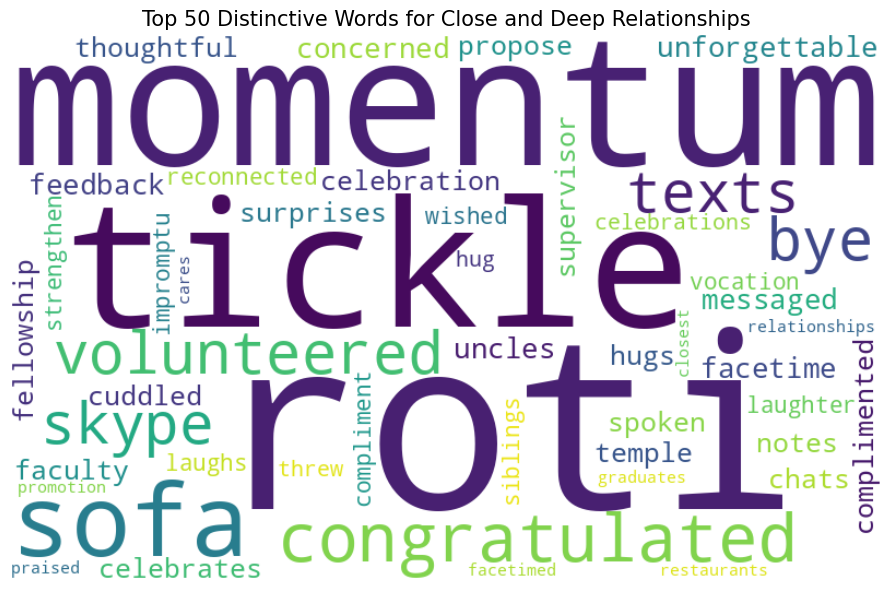


Top 50 distinctive words for Close and Deep Relationships:
roti: 0.078309
momentum: 0.052690
tickle: 0.048749
sofa: 0.029085
congratulated: 0.028734
volunteered: 0.027644
bye: 0.027454
texts: 0.026365
skype: 0.026004
unforgettable: 0.025972
uncles: 0.025899
messaged: 0.025875
feedback: 0.025147
facetime: 0.025038
concerned: 0.024829
hugs: 0.022871
celebration: 0.022731
thoughtful: 0.022704
complimented: 0.022485
cuddled: 0.022145
celebrates: 0.022080
notes: 0.021811
spoken: 0.021521
temple: 0.021083
chats: 0.020795
faculty: 0.020707
fellowship: 0.020641
supervisor: 0.020490
surprises: 0.020444
propose: 0.020365
reconnected: 0.020271
vocation: 0.020011
wished: 0.019999
compliment: 0.019629
strengthen: 0.019601
laughter: 0.019307
impromptu: 0.019160
siblings: 0.019063
laughs: 0.018917
celebrations: 0.018728
hug: 0.018701
threw: 0.018535
relationships: 0.018106
praised: 0.018031
cares: 0.018030
graduates: 0.018001
promotion: 0.017631
closest: 0.017616
restaurants: 0.017611
facetimed: 0.0

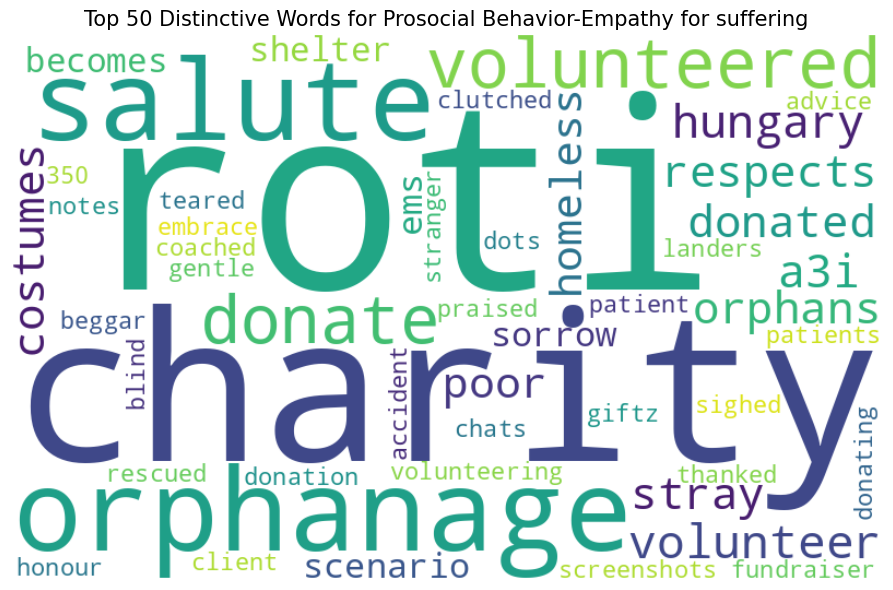


Top 50 distinctive words for Prosocial Behavior-Empathy for suffering:
roti: 0.090510
charity: 0.067253
orphanage: 0.064187
salute: 0.061148
volunteered: 0.055682
donate: 0.052939
volunteer: 0.051306
hungary: 0.049890
a3i: 0.049890
donated: 0.046374
costumes: 0.045894
respects: 0.045130
orphans: 0.044702
stray: 0.043909
homeless: 0.042588
poor: 0.041805
scenario: 0.041507
ems: 0.040488
sorrow: 0.039379
becomes: 0.037020
shelter: 0.037002
volunteering: 0.036498
beggar: 0.035401
screenshots: 0.034521
honour: 0.033604
blind: 0.033254
gentle: 0.033240
chats: 0.032957
notes: 0.032828
advice: 0.031493
landers: 0.031387
teared: 0.030828
giftz: 0.030448
stranger: 0.030086
rescued: 0.029915
dots: 0.029300
client: 0.028170
fundraiser: 0.028036
350: 0.027734
donation: 0.027539
praised: 0.027469
patients: 0.027329
donating: 0.027153
coached: 0.027153
clutched: 0.027145
sighed: 0.027145
thanked: 0.026757
accident: 0.026206
patient: 0.025771
embrace: 0.025766


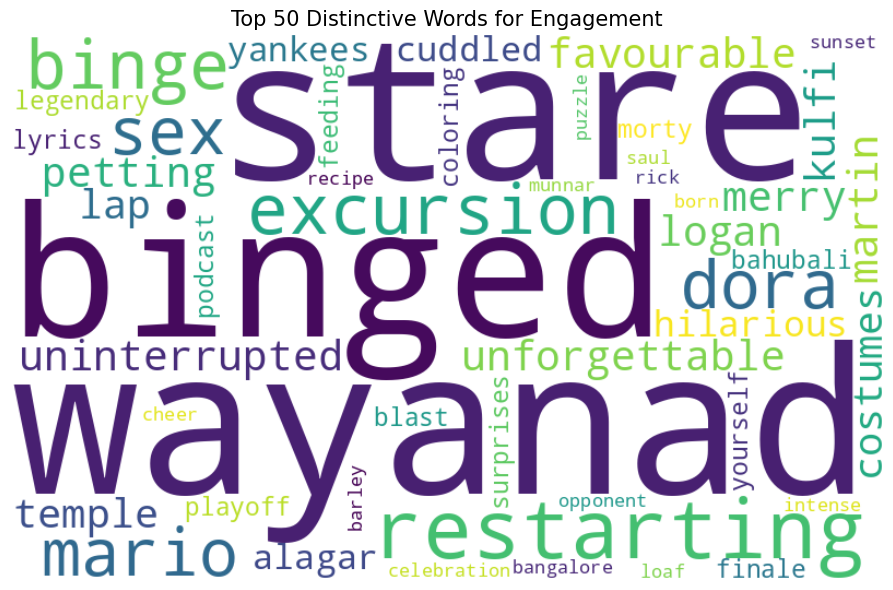


Top 50 distinctive words for Engagement:
wayanad: 0.044702
stare: 0.042842
binged: 0.035401
restarting: 0.032772
excursion: 0.029085
binge: 0.028318
dora: 0.027145
mario: 0.026639
sex: 0.026374
unforgettable: 0.026139
uninterrupted: 0.025510
kulfi: 0.024938
favourable: 0.024642
merry: 0.024297
logan: 0.023837
martin: 0.023824
petting: 0.023565
lap: 0.022779
costumes: 0.022619
temple: 0.022507
hilarious: 0.021049
alagar: 0.020988
cuddled: 0.020749
yankees: 0.020641
legendary: 0.020523
finale: 0.019965
yourself: 0.019893
blast: 0.019849
playoff: 0.019830
morty: 0.019544
lyrics: 0.019112
coloring: 0.019004
podcast: 0.018936
bahubali: 0.018753
feeding: 0.018563
surprises: 0.018554
bangalore: 0.018377
recipe: 0.018371
born: 0.018330
celebration: 0.017944
munnar: 0.017899
rick: 0.017771
cheer: 0.017494
barley: 0.017408
sunset: 0.017349
loaf: 0.017115
saul: 0.016969
puzzle: 0.016960
opponent: 0.016853
intense: 0.016804


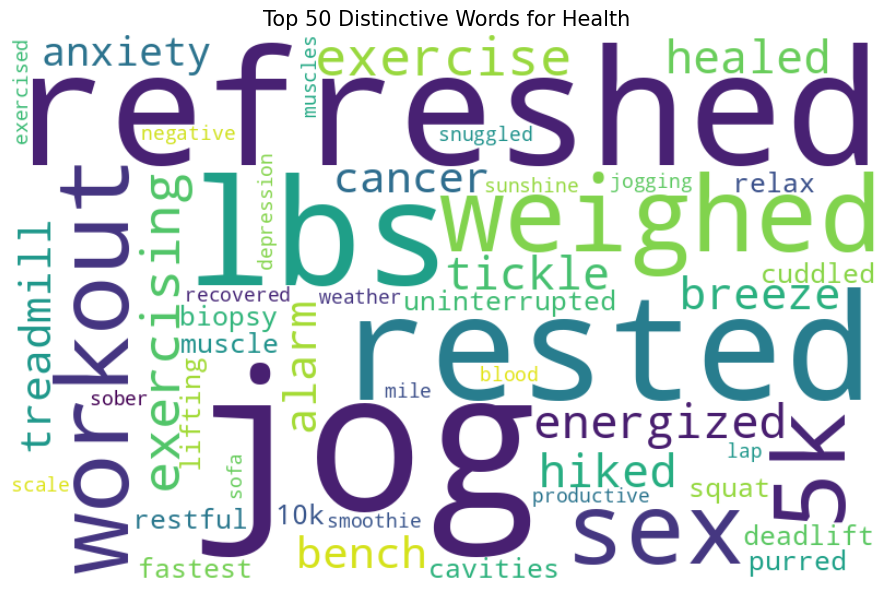


Top 50 distinctive words for Health:
jog: 0.046006
refreshed: 0.043751
lbs: 0.036912
rested: 0.036556
weighed: 0.035678
sex: 0.032623
workout: 0.031917
5k: 0.031724
exercise: 0.029889
exercising: 0.029505
energized: 0.028500
hiked: 0.027325
tickle: 0.026717
healed: 0.026438
alarm: 0.025781
breeze: 0.025757
cancer: 0.025110
bench: 0.024848
treadmill: 0.024794
anxiety: 0.024505
uninterrupted: 0.024176
squat: 0.024046
cuddled: 0.024001
10k: 0.023493
purred: 0.023263
biopsy: 0.023102
cavities: 0.022521
relax: 0.022174
deadlift: 0.022046
restful: 0.021750
muscle: 0.021564
lifting: 0.021452
fastest: 0.021147
productive: 0.020998
lap: 0.020670
exercised: 0.020350
jogging: 0.020233
recovered: 0.020132
sober: 0.019513
smoothie: 0.019482
snuggled: 0.019464
sunshine: 0.019362
weather: 0.019360
blood: 0.019123
muscles: 0.019038
negative: 0.018970
mile: 0.018895
scale: 0.018703
depression: 0.018700
sofa: 0.018549


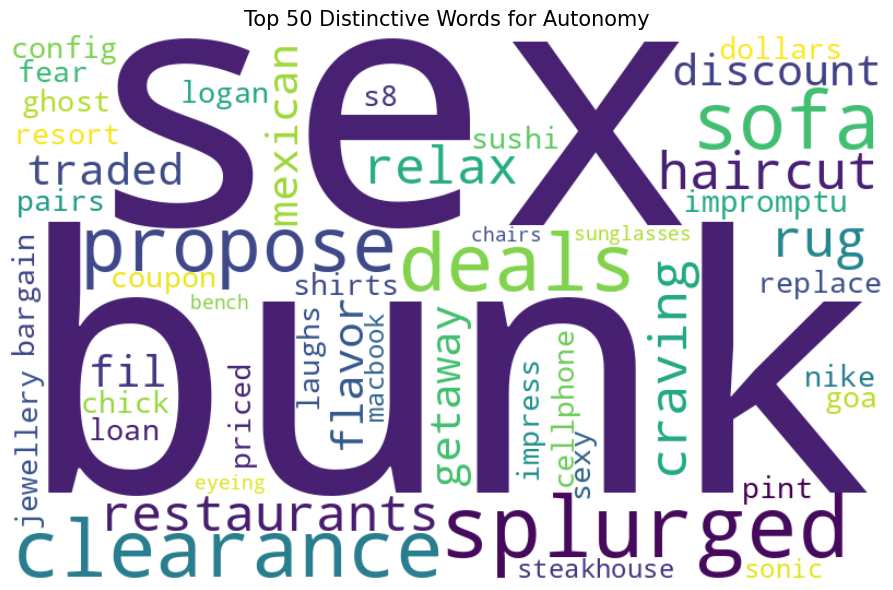


Top 50 distinctive words for Autonomy:
bunk: 0.034198
sex: 0.032397
splurged: 0.022010
clearance: 0.019236
deals: 0.019116
sofa: 0.018549
propose: 0.018039
haircut: 0.017809
craving: 0.017787
rug: 0.017746
restaurants: 0.017611
relax: 0.017544
discount: 0.017289
traded: 0.017219
mexican: 0.016838
flavor: 0.016545
fil: 0.016396
getaway: 0.016320
impromptu: 0.016235
replace: 0.015579
resort: 0.015481
shirts: 0.015481
cellphone: 0.015238
config: 0.015171
bargain: 0.014875
sexy: 0.014807
ghost: 0.014704
laughs: 0.014476
pairs: 0.014376
goa: 0.014361
dollars: 0.014306
loan: 0.014266
s8: 0.014182
nike: 0.014181
logan: 0.014032
coupon: 0.013919
fear: 0.013918
sushi: 0.013914
priced: 0.013903
pint: 0.013686
jewellery: 0.013642
impress: 0.013455
chick: 0.013424
steakhouse: 0.013391
sonic: 0.013323
macbook: 0.013256
sunglasses: 0.013109
chairs: 0.013092
eyeing: 0.012970
bench: 0.012893


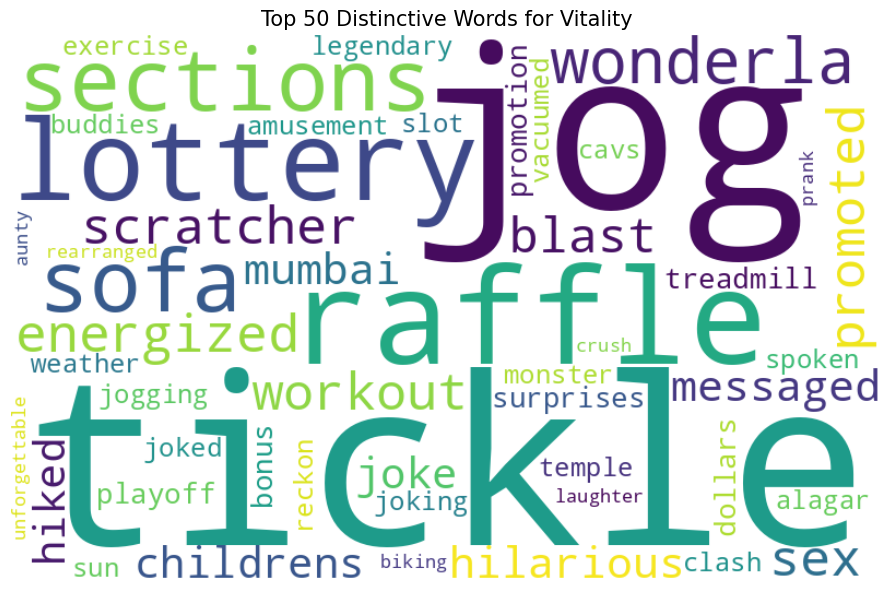


Top 50 distinctive words for Vitality:
tickle: 0.037260
jog: 0.033680
raffle: 0.028465
lottery: 0.023175
sections: 0.022646
sofa: 0.021920
wonderla: 0.021682
energized: 0.021012
scratcher: 0.019851
promoted: 0.019535
workout: 0.019274
sex: 0.018991
blast: 0.017639
hilarious: 0.017557
mumbai: 0.017216
messaged: 0.016984
childrens: 0.016762
hiked: 0.016761
joke: 0.016590
surprises: 0.016550
bonus: 0.016389
playoff: 0.016063
treadmill: 0.015956
promotion: 0.015924
dollars: 0.015913
legendary: 0.015904
temple: 0.015870
jogging: 0.015538
weather: 0.015409
joked: 0.015157
exercise: 0.014996
cavs: 0.014654
slot: 0.014631
amusement: 0.014551
reckon: 0.014514
spoken: 0.014406
alagar: 0.014303
joking: 0.014216
monster: 0.014181
sun: 0.014028
vacuumed: 0.013764
clash: 0.013755
buddies: 0.013593
rearranged: 0.013447
laughter: 0.013387
aunty: 0.013346
unforgettable: 0.013303
crush: 0.013269
prank: 0.013254
biking: 0.013141


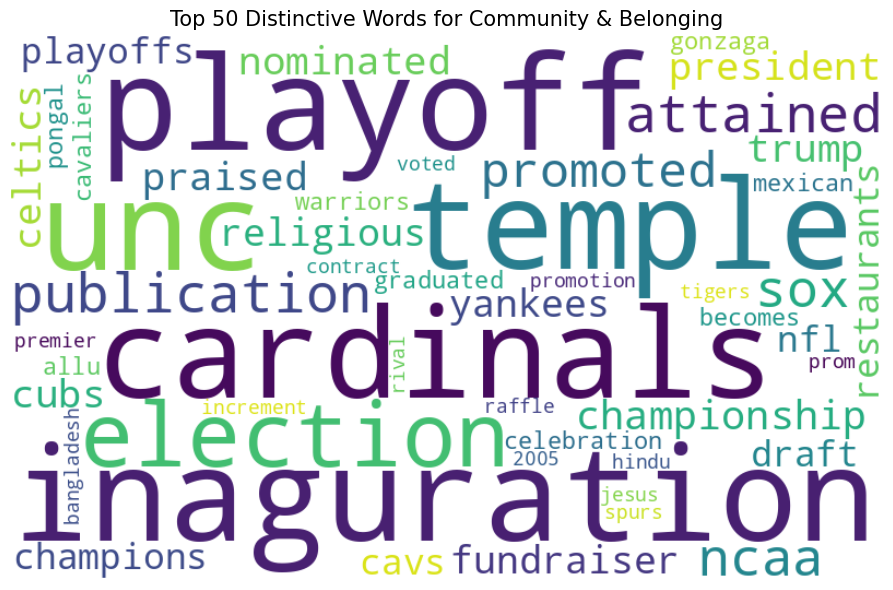


Top 50 distinctive words for Community & Belonging:
inaguration: 0.031387
playoff: 0.031218
cardinals: 0.028816
temple: 0.028109
unc: 0.027784
election: 0.026455
publication: 0.026389
attained: 0.024902
sox: 0.024104
ncaa: 0.023693
promoted: 0.023640
championship: 0.022698
trump: 0.021582
nominated: 0.021282
celtics: 0.020954
cubs: 0.020591
praised: 0.020502
president: 0.020283
religious: 0.020235
fundraiser: 0.020104
yankees: 0.019880
champions: 0.019795
nfl: 0.019737
cavs: 0.019633
playoffs: 0.019616
draft: 0.019229
restaurants: 0.019219
graduated: 0.019138
celebration: 0.018945
pongal: 0.018863
gonzaga: 0.018571
warriors: 0.018475
mexican: 0.018430
becomes: 0.018415
cavaliers: 0.018341
allu: 0.018093
promotion: 0.018028
prom: 0.018012
hindu: 0.017939
voted: 0.017919
2005: 0.017874
raffle: 0.017460
contract: 0.017443
spurs: 0.017079
premier: 0.017063
bangladesh: 0.017059
tigers: 0.016991
jesus: 0.016974
rival: 0.016368
increment: 0.016353


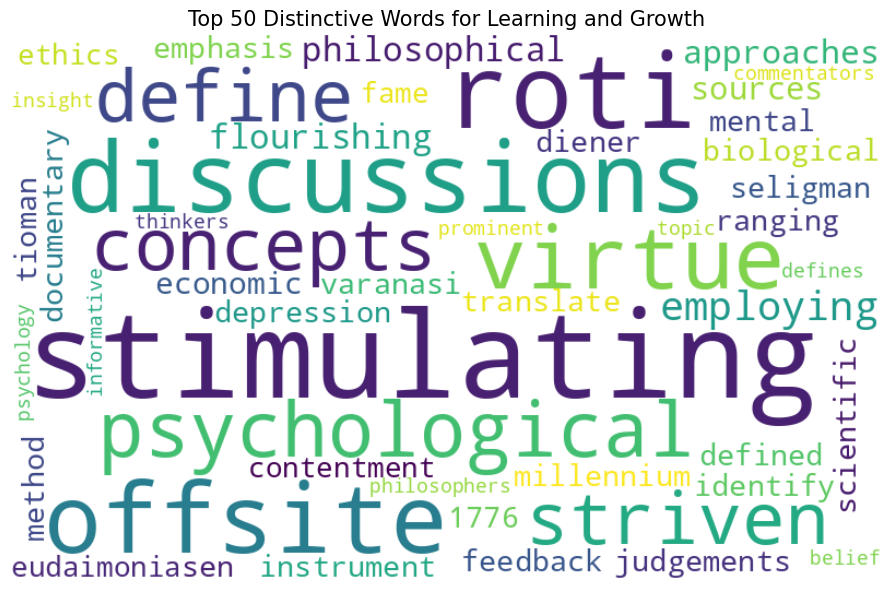


Top 50 distinctive words for Learning and Growth:
stimulating: 0.157347
roti: 0.113808
discussions: 0.099368
offsite: 0.097191
virtue: 0.077115
psychological: 0.060472
define: 0.052912
concepts: 0.052486
striven: 0.052093
employing: 0.050913
philosophical: 0.049797
flourishing: 0.049573
approaches: 0.044903
sources: 0.043279
economic: 0.041456
ranging: 0.039774
feedback: 0.038637
scientific: 0.038285
defined: 0.037790
seligman: 0.037109
method: 0.036970
1776: 0.036882
emphasis: 0.036187
mental: 0.035660
tioman: 0.035401
judgements: 0.035322
depression: 0.035148
biological: 0.034970
millennium: 0.034646
sen: 0.034646
diener: 0.034646
documentary: 0.034521
instrument: 0.033604
translate: 0.033443
varanasi: 0.033419
identify: 0.032777
eudaimonia: 0.031259
contentment: 0.031057
fame: 0.030884
ethics: 0.030884
philosophers: 0.030499
thinkers: 0.030499
prominent: 0.029791
informative: 0.029300
insight: 0.029300
belief: 0.029110
topic: 0.028557
psychology: 0.028448
defines: 0.028125
commenta

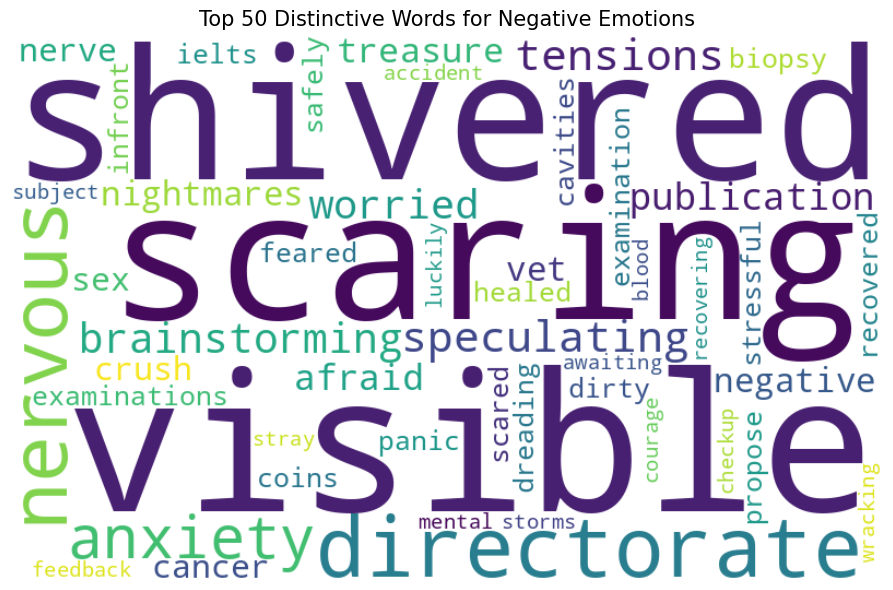


Top 50 distinctive words for Negative Emotions:
visible: 0.053217
shivered: 0.051566
scaring: 0.050400
directorate: 0.046460
nervous: 0.041527
anxiety: 0.041056
speculating: 0.039234
tensions: 0.039234
brainstorming: 0.035718
worried: 0.033695
publication: 0.033338
afraid: 0.031038
treasure: 0.029529
nightmares: 0.028260
negative: 0.028123
vet: 0.028067
sex: 0.026660
nerve: 0.026559
cancer: 0.026144
crush: 0.025979
examinations: 0.025448
cavities: 0.025111
examination: 0.025097
biopsy: 0.025073
coins: 0.024673
scared: 0.024636
dirty: 0.024434
dreading: 0.024408
ielts: 0.023493
healed: 0.023362
infront: 0.022770
feared: 0.022570
panic: 0.022506
safely: 0.021677
propose: 0.021289
stressful: 0.021186
recovered: 0.021171
awaiting: 0.021131
recovering: 0.020902
subject: 0.020837
storms: 0.020807
luckily: 0.020787
stray: 0.020782
mental: 0.020565
blood: 0.020504
feedback: 0.020370
accident: 0.020339
courage: 0.020309
wracking: 0.020265
checkup: 0.020226


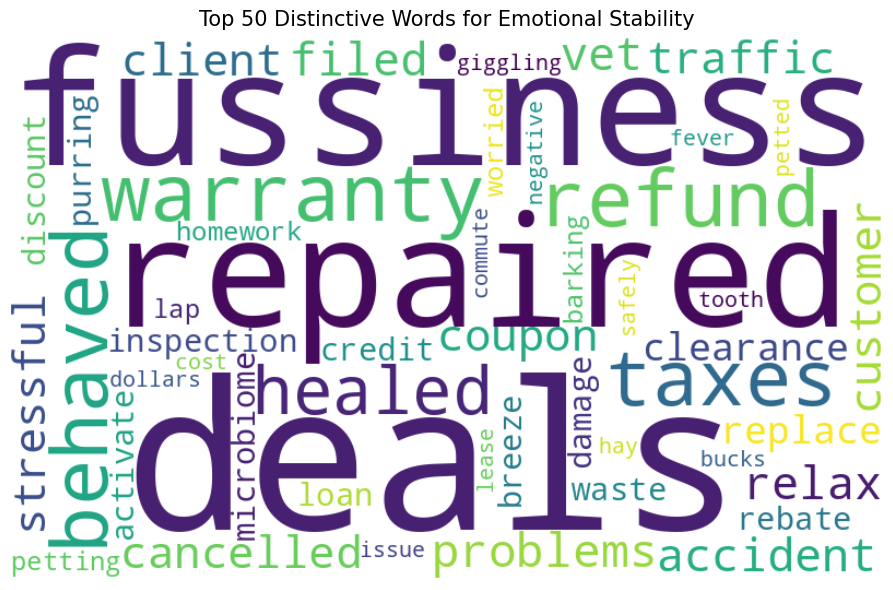


Top 50 distinctive words for Emotional Stability:
deals: 0.024481
fussiness: 0.023663
repaired: 0.021892
warranty: 0.021669
behaved: 0.020186
refund: 0.020070
taxes: 0.019870
healed: 0.019796
problems: 0.019760
vet: 0.019208
relax: 0.019137
accident: 0.018991
filed: 0.018620
cancelled: 0.018072
customer: 0.017821
traffic: 0.017799
client: 0.017430
coupon: 0.017429
stressful: 0.017406
replace: 0.017253
clearance: 0.017252
inspection: 0.017174
rebate: 0.016991
loan: 0.016834
credit: 0.016450
waste: 0.016389
discount: 0.016372
activate: 0.016336
purring: 0.016014
microbiome: 0.015997
damage: 0.015971
breeze: 0.015931
homework: 0.015747
worried: 0.015714
barking: 0.015696
petting: 0.015589
lap: 0.015510
giggling: 0.015502
dollars: 0.015436
negative: 0.015366
bucks: 0.015331
issue: 0.015221
fever: 0.015123
hay: 0.015114
tooth: 0.015112
commute: 0.015004
safely: 0.014997
cost: 0.014977
lease: 0.014876
petted: 0.014835


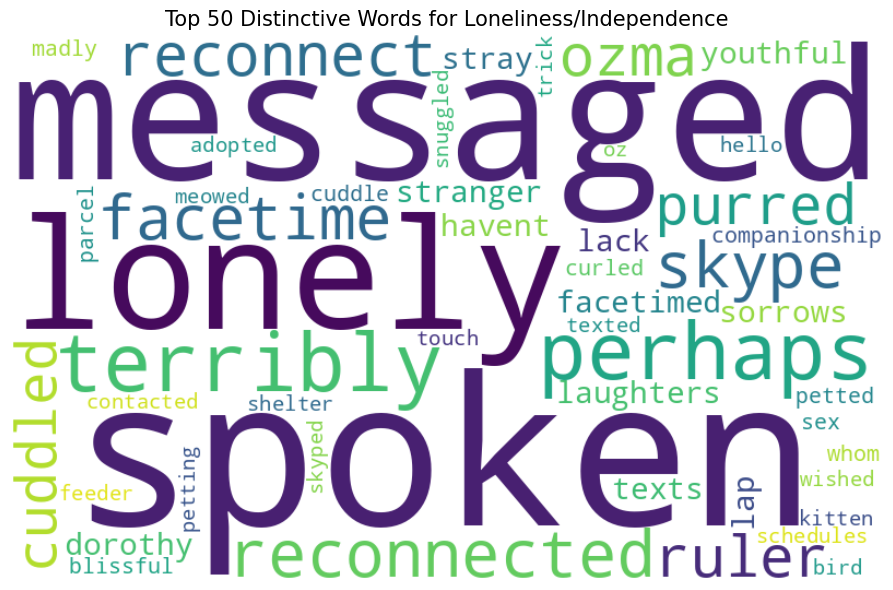


Top 50 distinctive words for Loneliness/Independence:
spoken: 0.031684
messaged: 0.031021
lonely: 0.029425
terribly: 0.029344
perhaps: 0.028622
reconnected: 0.028508
skype: 0.027438
facetime: 0.025558
reconnect: 0.024062
ozma: 0.022908
ruler: 0.022908
purred: 0.022521
cuddled: 0.022386
laughters: 0.021781
youthful: 0.021308
lap: 0.021258
facetimed: 0.020807
stray: 0.020782
dorothy: 0.020472
stranger: 0.019903
lack: 0.019838
texts: 0.019510
sorrows: 0.019018
havent: 0.018743
companionship: 0.018610
whom: 0.018272
sex: 0.017998
petted: 0.017549
curled: 0.017528
blissful: 0.016714
cuddle: 0.016645
parcel: 0.016320
madly: 0.016259
oz: 0.015286
hello: 0.015192
adopted: 0.015181
snuggled: 0.015096
bird: 0.014608
shelter: 0.014531
meowed: 0.014470
petting: 0.014256
texted: 0.014186
wished: 0.014154
touch: 0.014136
feeder: 0.014124
trick: 0.014075
contacted: 0.014056
kitten: 0.013882
schedules: 0.013694
skyped: 0.013639


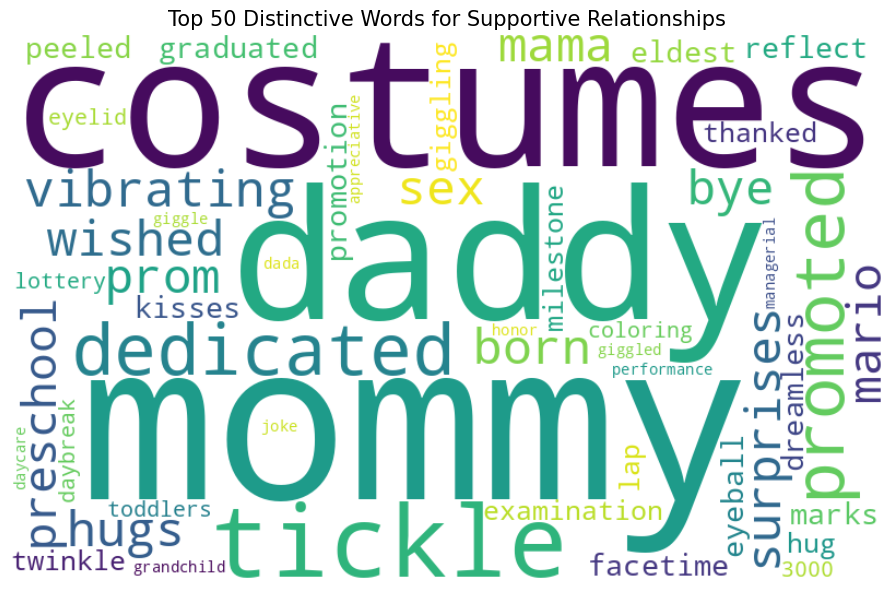


Top 50 distinctive words for Supportive Relationships:
mommy: 0.035268
costumes: 0.028125
daddy: 0.027898
tickle: 0.024433
dedicated: 0.024082
promoted: 0.023109
vibrating: 0.022868
surprises: 0.021856
wished: 0.021589
born: 0.021554
sex: 0.021291
hugs: 0.021100
prom: 0.020628
bye: 0.020165
mama: 0.020045
preschool: 0.019539
mario: 0.019102
graduated: 0.018716
reflect: 0.018439
facetime: 0.018327
promotion: 0.018273
eldest: 0.018258
peeled: 0.018001
kisses: 0.017951
dreamless: 0.017780
eyeball: 0.017780
marks: 0.017416
examination: 0.017302
giggling: 0.017099
twinkle: 0.017059
thanked: 0.016932
milestone: 0.016876
hug: 0.016754
lap: 0.016743
coloring: 0.016476
toddlers: 0.016407
3000: 0.015985
daybreak: 0.015957
eyelid: 0.015957
lottery: 0.015495
performance: 0.015375
joke: 0.015301
grandchild: 0.015286
managerial: 0.015280
honor: 0.015208
giggled: 0.015145
daycare: 0.015119
dada: 0.015114
giggle: 0.015012
appreciative: 0.014961


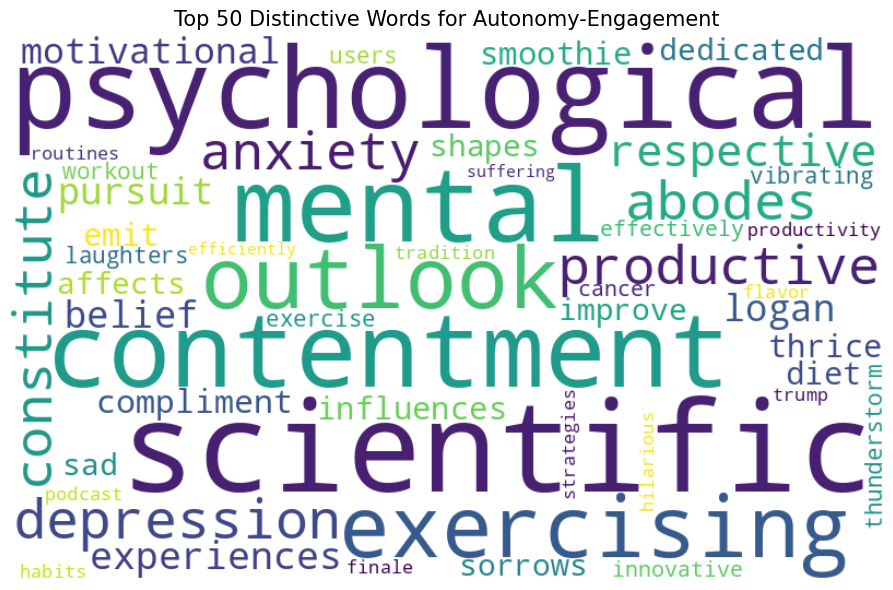


Top 50 distinctive words for Autonomy-Engagement:
scientific: 0.035748
psychological: 0.034873
mental: 0.030176
contentment: 0.030066
exercising: 0.025693
outlook: 0.025656
depression: 0.023252
productive: 0.022914
abodes: 0.022646
constitute: 0.022646
anxiety: 0.022579
respective: 0.022452
experiences: 0.022373
belief: 0.021542
pursuit: 0.021542
logan: 0.021378
motivational: 0.020641
compliment: 0.019629
smoothie: 0.019482
diet: 0.019139
emit: 0.019072
thrice: 0.019072
influences: 0.018878
dedicated: 0.018801
affects: 0.018610
sad: 0.018407
sorrows: 0.018023
shapes: 0.018000
improve: 0.017987
laughters: 0.017643
thunderstorm: 0.017402
users: 0.017370
workout: 0.017360
vibrating: 0.017191
exercise: 0.017174
effectively: 0.016686
innovative: 0.016686
cancer: 0.016673
productivity: 0.016547
flavor: 0.016545
podcast: 0.016315
tradition: 0.016246
routines: 0.016232
habits: 0.016171
finale: 0.016152
hilarious: 0.016107
trump: 0.015907
strategies: 0.015536
efficiently: 0.015502
suffering: 0

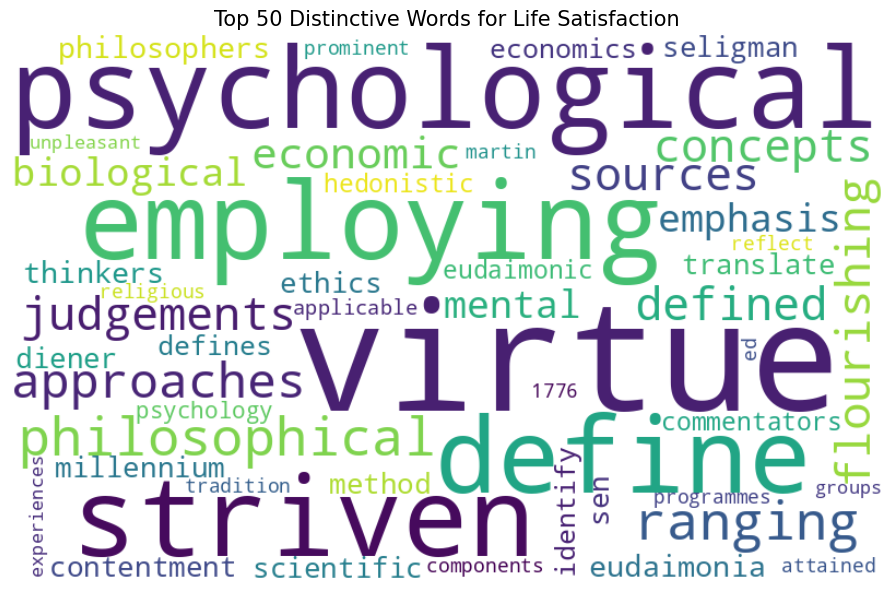


Top 50 distinctive words for Life Satisfaction:
virtue: 0.110297
psychological: 0.091207
striven: 0.090084
employing: 0.087158
define: 0.082117
philosophical: 0.079602
ranging: 0.078150
approaches: 0.077650
flourishing: 0.072414
concepts: 0.069915
judgements: 0.069619
defined: 0.069402
sources: 0.068959
economic: 0.062153
biological: 0.060473
mental: 0.057191
emphasis: 0.057048
philosophers: 0.056670
thinkers: 0.056670
eudaimonia: 0.054906
translate: 0.054569
seligman: 0.054114
ethics: 0.053915
method: 0.053499
millennium: 0.053312
sen: 0.053312
diener: 0.053312
scientific: 0.053056
contentment: 0.051926
identify: 0.049334
economics: 0.047584
defines: 0.046692
commentators: 0.046692
hedonistic: 0.046692
eudaimonic: 0.046692
psychology: 0.043590
applicable: 0.041757
components: 0.039553
attained: 0.039278
martin: 0.039221
tradition: 0.039041
programmes: 0.039009
prominent: 0.038751
religious: 0.038149
1776: 0.036882
ed: 0.035142
reflect: 0.034177
unpleasant: 0.031412
experiences: 0.031

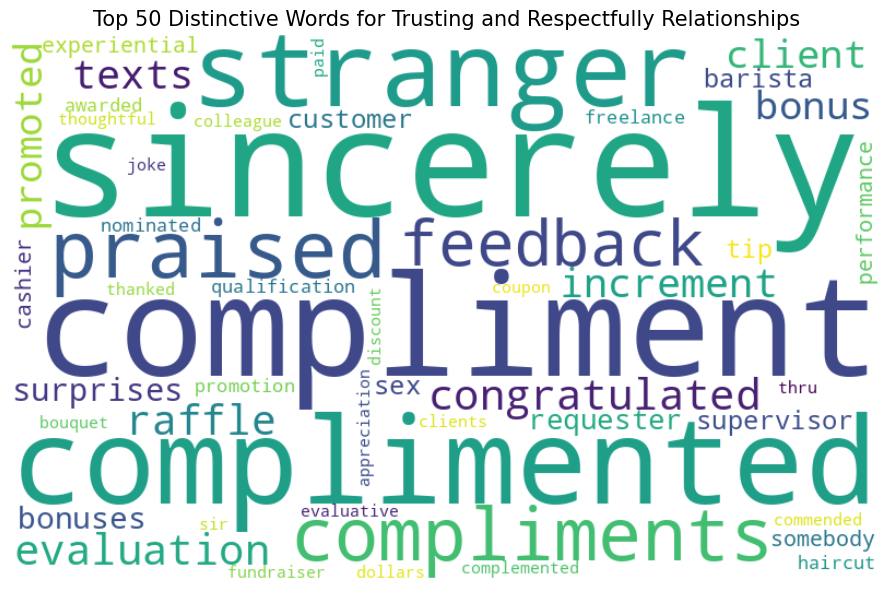


Top 50 distinctive words for Trusting and Respectfully Relationships:
sincerely: 0.048834
compliment: 0.041777
complimented: 0.040692
stranger: 0.039349
praised: 0.038889
compliments: 0.037453
feedback: 0.036013
congratulated: 0.031793
evaluation: 0.031422
raffle: 0.029934
texts: 0.027925
increment: 0.027717
client: 0.026952
promoted: 0.026497
bonus: 0.025950
surprises: 0.024910
bonuses: 0.023923
requester: 0.023871
supervisor: 0.023285
tip: 0.023094
sex: 0.022982
barista: 0.022841
customer: 0.022018
experiential: 0.021960
somebody: 0.021656
cashier: 0.021604
performance: 0.021436
qualification: 0.020443
freelance: 0.019402
awarded: 0.019171
promotion: 0.019126
nominated: 0.018806
haircut: 0.018727
complemented: 0.018638
bouquet: 0.018471
evaluative: 0.018381
thru: 0.018326
coupon: 0.018258
sir: 0.018068
thanked: 0.017366
joke: 0.016854
dollars: 0.016793
paid: 0.016770
thoughtful: 0.016535
appreciation: 0.016528
commended: 0.016347
fundraiser: 0.016168
discount: 0.015901
clients: 0.01

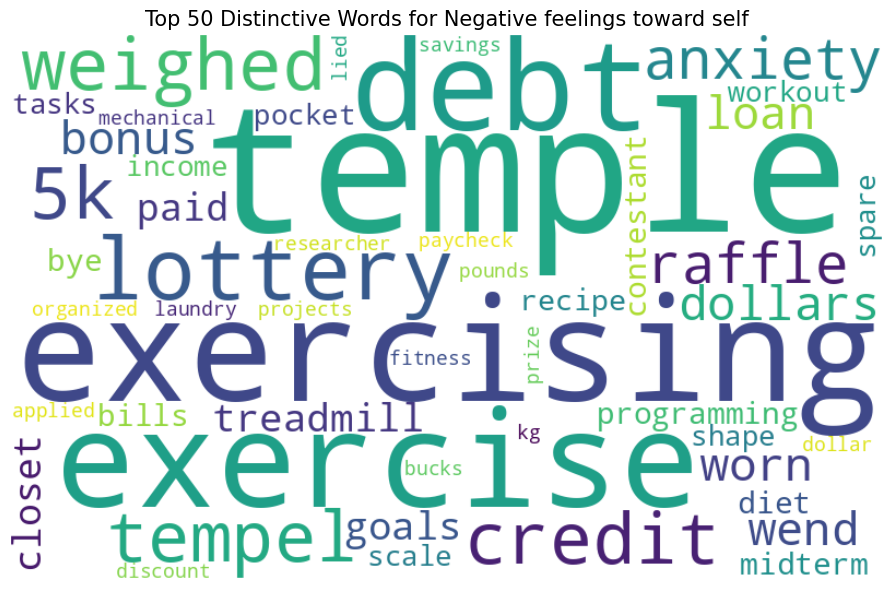


Top 50 distinctive words for Negative feelings toward self:
temple: 0.024655
exercising: 0.022154
exercise: 0.019149
debt: 0.018994
lottery: 0.018447
weighed: 0.018062
5k: 0.017944
credit: 0.017627
tempel: 0.017111
anxiety: 0.016085
raffle: 0.015355
dollars: 0.015208
worn: 0.014860
wend: 0.014311
loan: 0.014266
bonus: 0.014146
treadmill: 0.014032
goals: 0.013811
closet: 0.013414
paid: 0.013119
programming: 0.013061
bills: 0.012843
bye: 0.012814
diet: 0.012788
contestant: 0.012628
midterm: 0.012430
recipe: 0.011939
income: 0.011457
scale: 0.011411
pocket: 0.011211
spare: 0.011056
tasks: 0.011040
shape: 0.010860
workout: 0.010722
organized: 0.010620
savings: 0.010498
bucks: 0.010262
laundry: 0.010088
kg: 0.010085
paycheck: 0.010003
projects: 0.009959
pounds: 0.009902
mechanical: 0.009760
applied: 0.009752
lied: 0.009502
researcher: 0.009451
fitness: 0.009429
dollar: 0.009401
discount: 0.009175
prize: 0.009123


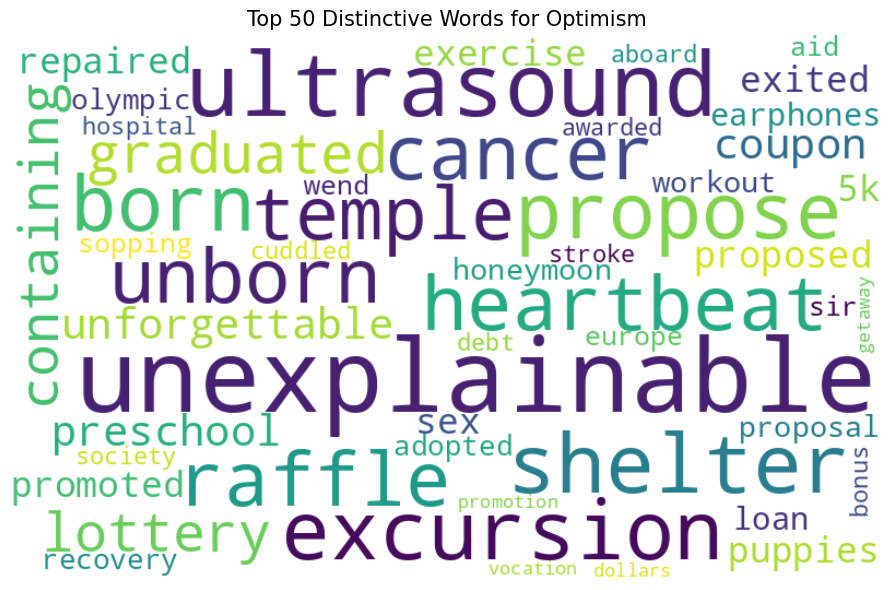


Top 50 distinctive words for Optimism:
unexplainable: 0.038117
ultrasound: 0.027392
excursion: 0.023107
shelter: 0.022868
propose: 0.020365
born: 0.019601
cancer: 0.019302
unborn: 0.019294
heartbeat: 0.019147
raffle: 0.019093
temple: 0.018754
graduated: 0.018566
containing: 0.018060
lottery: 0.017791
unforgettable: 0.017767
preschool: 0.017764
coupon: 0.017429
proposed: 0.017265
repaired: 0.016478
exited: 0.016205
promoted: 0.015824
exercise: 0.015824
5k: 0.015781
sex: 0.015384
puppies: 0.015029
earphones: 0.014875
loan: 0.014737
honeymoon: 0.014621
proposal: 0.014361
workout: 0.014263
recovery: 0.014247
olympic: 0.014181
adopted: 0.014159
sopping: 0.013808
aid: 0.013726
europe: 0.013699
wend: 0.013690
sir: 0.013485
hospital: 0.013390
aboard: 0.013256
debt: 0.013138
awarded: 0.013127
society: 0.013073
stroke: 0.013029
bonus: 0.012963
cuddled: 0.012917
promotion: 0.012907
getaway: 0.012895
dollars: 0.012892
vocation: 0.012873


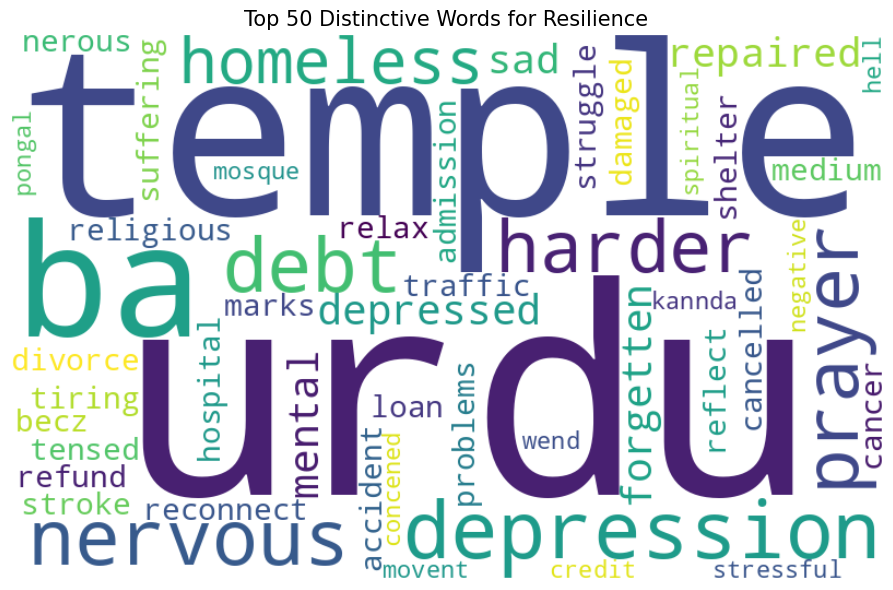


Top 50 distinctive words for Resilience:
urdu: 0.030907
temple: 0.030766
ba: 0.030259
depression: 0.024877
nervous: 0.022897
debt: 0.022159
prayer: 0.021940
harder: 0.021733
homeless: 0.020775
depressed: 0.020690
mental: 0.020565
forgetten: 0.020325
sad: 0.019790
repaired: 0.019473
religious: 0.019176
loan: 0.019169
reconnect: 0.019116
cancer: 0.018869
tensed: 0.018771
cancelled: 0.018682
reflect: 0.018439
stroke: 0.018289
suffering: 0.018239
marks: 0.018127
accident: 0.017869
tiring: 0.017855
traffic: 0.017799
hospital: 0.017612
becz: 0.017391
divorce: 0.017332
refund: 0.017102
struggle: 0.017081
problems: 0.017044
admission: 0.017013
damaged: 0.016907
nerous: 0.016708
medium: 0.016577
shelter: 0.016523
relax: 0.016414
stressful: 0.016270
mosque: 0.016235
spiritual: 0.016201
kannda: 0.015997
credit: 0.015872
hell: 0.015615
negative: 0.015366
wend: 0.015348
pongal: 0.015280
movent: 0.015280
concened: 0.015280
['shivered', 'hindu', 'forgt', 'ruler', 'autonomy', 'feeding', 'nightmares',

In [21]:
# First, calculate dominant factors for your dataframe
factor_columns = [col for col in factor_df.columns if col in factor_label_map.values()]
factors_only_df = factor_df[factor_columns]

# Get dominant factor index (highest score per sentence)
factor_df['dominant_factor'] = factors_only_df.idxmax(axis=1)
factor_df['factor_strength'] = factors_only_df.max(axis=1)

# Run the analysis with balanced word importance calculation
freq_dict, importance_dict, used_words = analyze_factor_word_importance(
    factor_df, 
    text_column='cleaned_hm',
    factor_column='dominant_factor',
    strength_column='factor_strength',
    strength_threshold=0.5,
    factors_to_visualize = [
        "Positive Emotions",
        "Meaning and Mastery",
        "Negative attitudes toward life",
        "Close and Deep Relationships",
        "Prosocial Behavior-Empathy for suffering",
        "Engagement",
        "Health",
        "Autonomy",
        "Vitality",
        "Community & Belonging",
        "Learning and Growth",
        "Negative Emotions",
        "Emotional Stability",
        "Loneliness/Independence",
        "Supportive Relationships",
        "Autonomy-Engagement",
        "Life Satisfaction",
        "Trusting and Respectfully Relationships",
        "Negative feelings toward self",
        "Optimism",
        "Resilience"
    ],
    top_n=50,
    stopwords=universal_stopwords,
    min_term_freq=3,       # Words must appear at least 3 times in a factor
    sublinear_tf=True,     # Use logarithmic scaling for term frequency
    idf_smoothing=1.0      # Smoothing factor for IDF calculation
)


print(used_words)

In [16]:
# Count the number of moments per dominant factor
factor_counts = factor_df['dominant_factor'].value_counts()

# Print the count
print("Number of moments per dominant factor:")
print(factor_counts)



Number of moments per dominant factor:
dominant_factor
Close and Deep Relationships                9746
Meaning and Mastery                         8413
Health                                      6998
Autonomy                                    6027
Learning and Growth                         5417
Engagement                                  5350
Negative attitudes toward life              5316
Supportive Relationships                    5120
Community & Belonging                       5066
Loneliness/Independence                     4792
Trusting and Respectfully Relationships     4605
Prosocial Behavior-Empathy for suffering    4523
Emotional Stability                         4303
Optimism                                    4090
Life Satisfaction                           3961
Vitality                                    3841
Negative Emotions                           3770
Resilience                                  3220
Autonomy-Engagement                         3104
Positive Emoti